# Lab 4 -- Aureliano Liu

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,8)

In [3]:
hf = h5py.File('gammaray_lab4.h5', 'r')
hf.keys()
data = np.array(hf.get('data'))
data[:,0]
hf.close()

## Problem 1

#### Question 1 

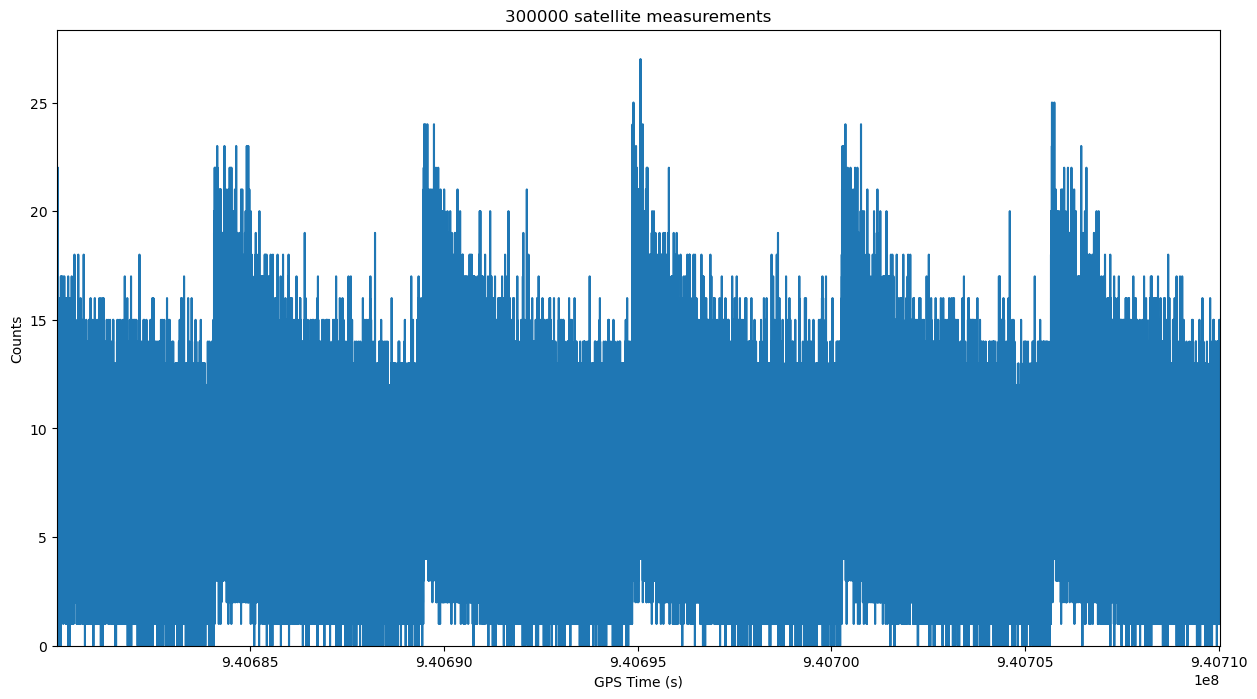

In [4]:
num_points = 300_000
plt.title(f"{num_points} satellite measurements")
plt.xlabel('GPS Time (s)')
plt.ylabel('Counts')
plt.plot(data[0][0:num_points], data[3][0:num_points]);
plt.xlim(data[0][0], data[0][num_points])
plt.ylim(0, None);

We can construct the pdf by counting how many counts are there for each x value, and then dividing the result by the total number of counts, by which we can then approximate the probability at that x value; By repeating the same procedure for each x, we can find the approximated pdf;

We can simply use the bins paramter in matplotlib.hist function : 

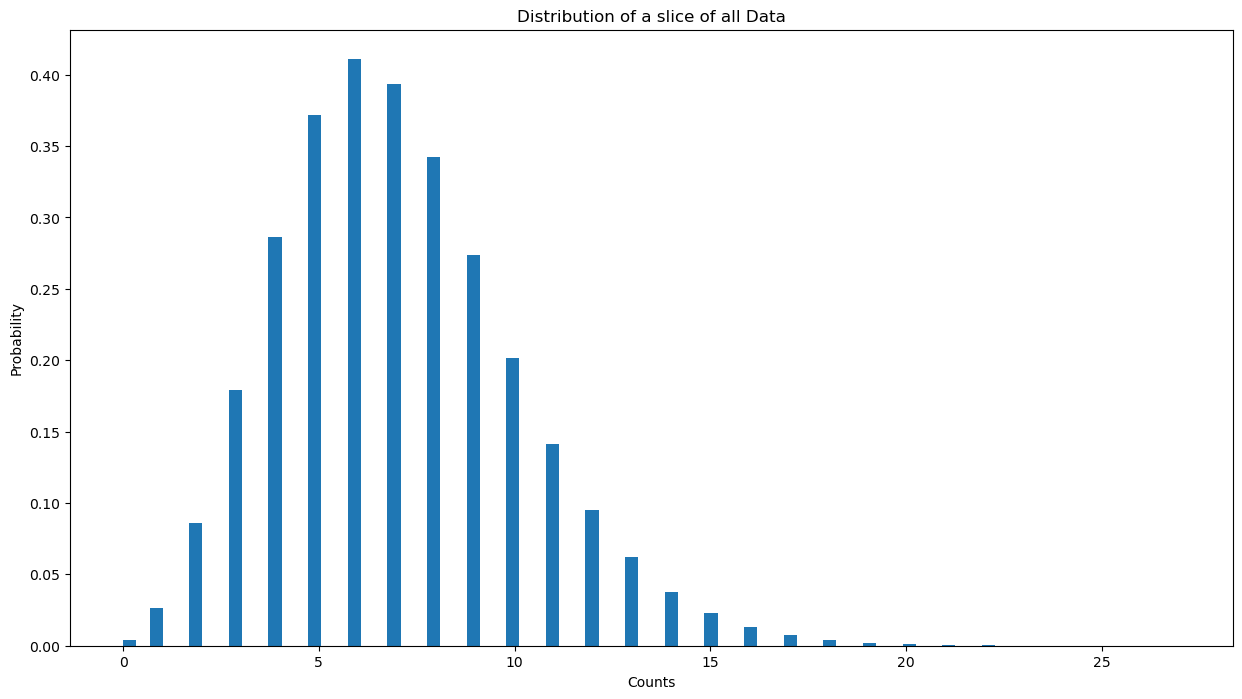

In [5]:
num_points = 500000
fig2,ax2 = plt.subplots()
ax2.set_title("Distribution of a slice of all Data")
ax2.set_xlabel('Counts')
ax2.set_ylabel('Probability')
ax2.hist(data[3][0:num_points], bins=80, density=True);

#### Question 2

In the plot, we can see that there are some "jumps" and the overall trend seems to be periodic.Thus, the plot above indicates that there could be a periodic pattern in the relationship between number of counts and GPS time. One possible explanation to this is that there is some extra radiation at those spikes which induce those "jumps"

#### Question 3

We chose Poisson distribution since both the Poisson and the data points are discrete and rare

We change the input of mean value to the Poisson distribution, and we think $\mu$ = 7 is a great fit to the real data

(0.0, 21.0)

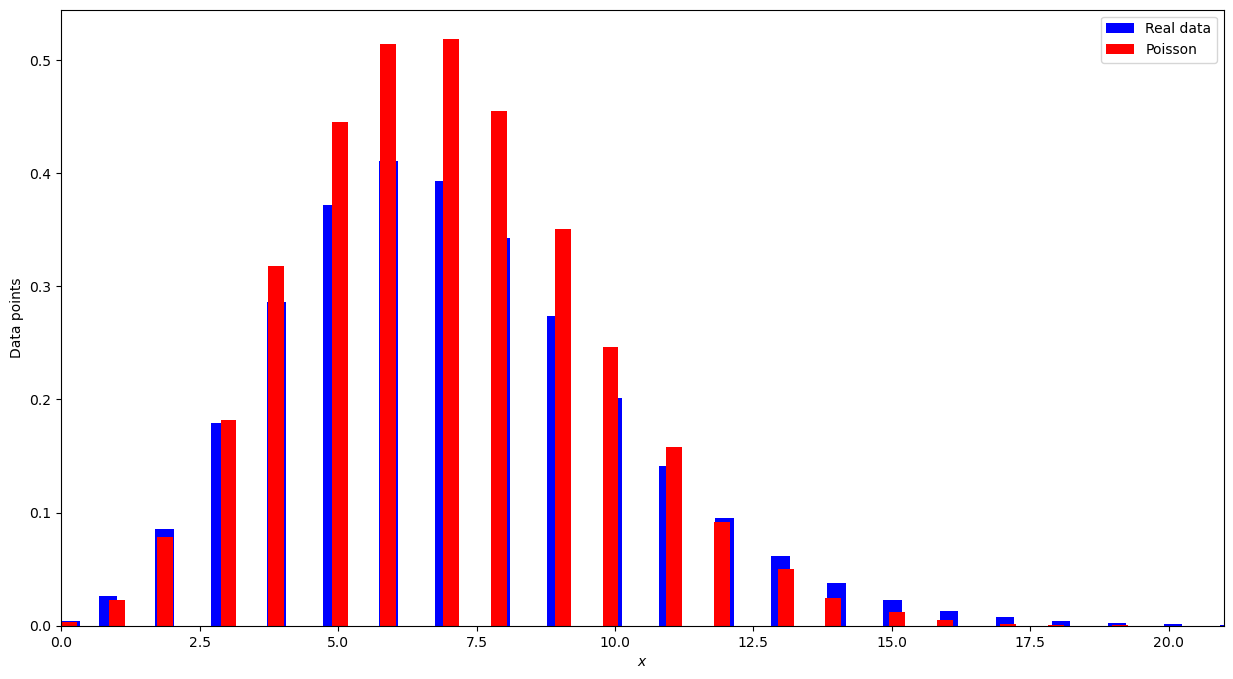

In [13]:
fig3,ax3 = plt.subplots()
ax3.hist(data[3][0:num_points], bins=80, density=True,color = 'b',label="Real data");
dist = stats.poisson(7)
vals = dist.rvs(num_points)
ax3.hist(vals, bins=80, density=True,color = 'r',label="Poisson");
ax3.legend()
ax3.set_xlabel("$x$")
ax3.set_ylabel("Data points")
ax3.set_xlim([0,21])

If we plot them into the log scale, we can see:

(0.0, 21.0)

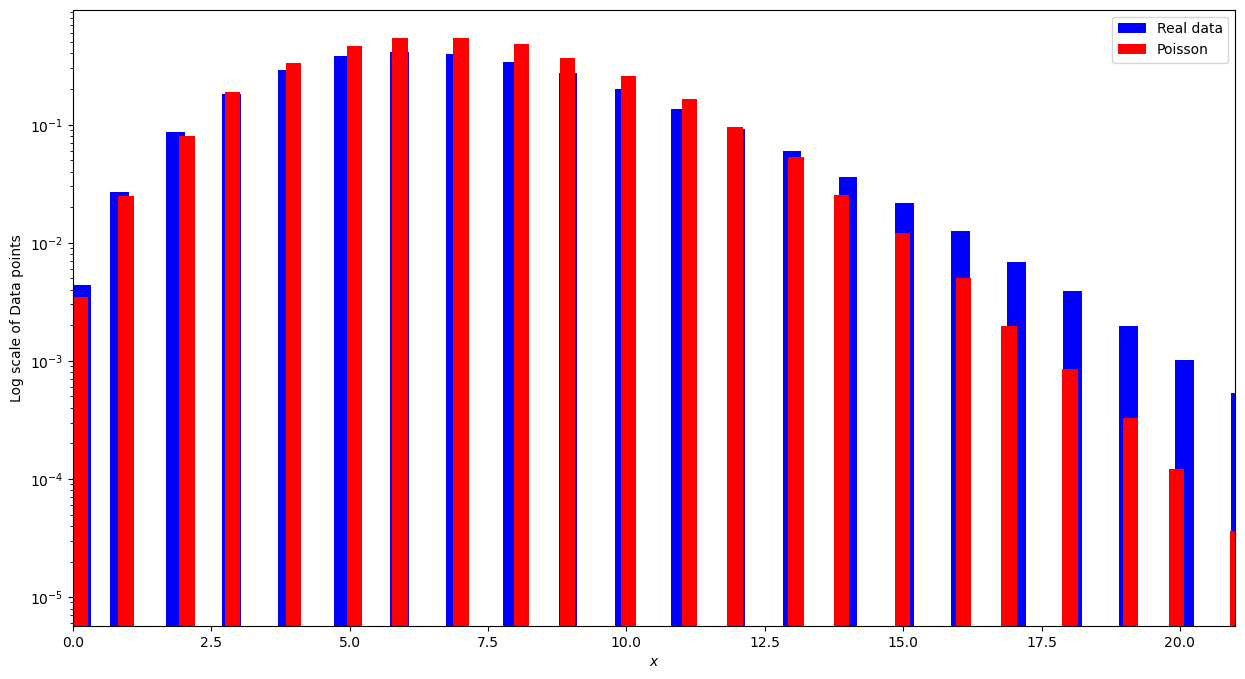

In [9]:
fig4,ax4 = plt.subplots()
plt.yscale("log")
ax4.hist(data[3][0:num_points], bins=80, density=True,color = 'b',label="Real data");
ax4.hist(vals, bins=80, density=True,color = 'r',label="Poisson");
ax4.legend()
ax4.set_xlabel("$x$")
ax4.set_ylabel("Log scale of Data points")
ax4.set_xlim([0,21])

The Poisson distribution with mean = 7 also fit well into the real data

#### Question 4

We can find the value in the Poisson distribution where measurement will have 5 sigma siginificance by: 

In [11]:
stats.poisson.ppf(stats.norm.cdf(5),7)

24.0

Conclusion : So to have a 5 sigma significance, we need at least 24 in the Poisson distribution

## Problem 2

#### Question 1

In [14]:
hf = h5py.File('images.h5', 'r')
hf.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

In [15]:
data = np.array(hf.get('imagestack'))
data[:,0]
hf.close()

#### Question 2

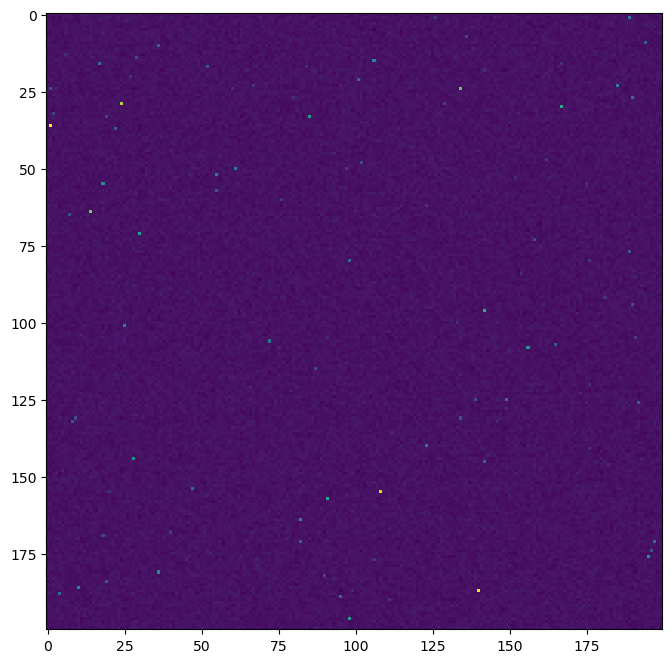

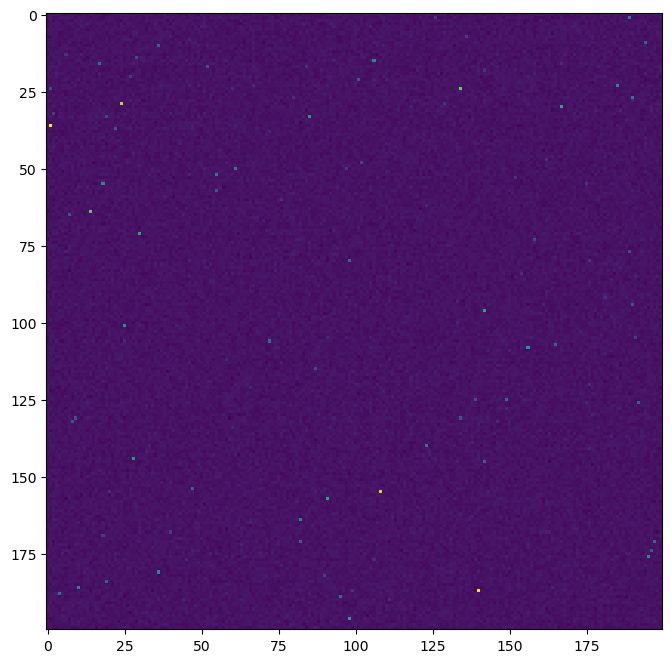

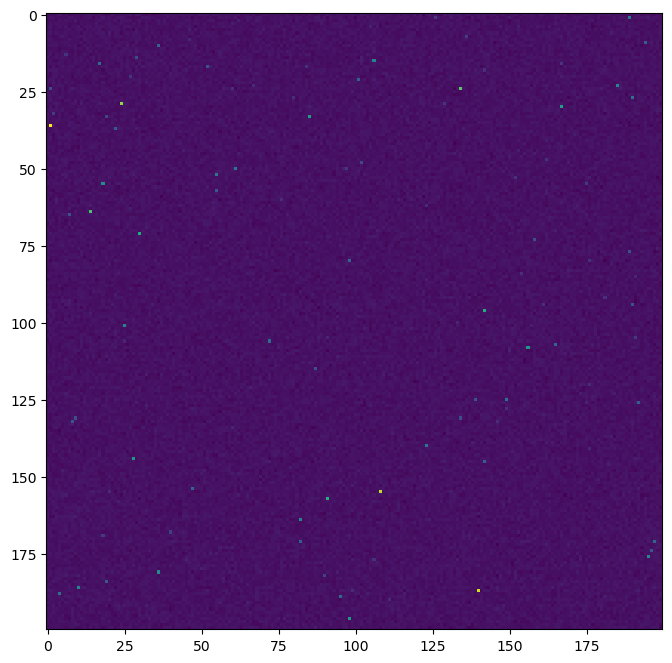

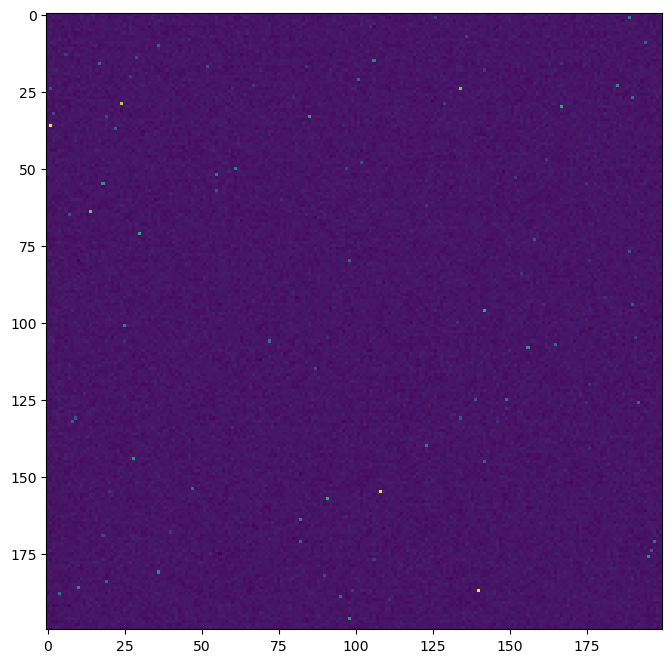

In [16]:
fig0,ax0 = plt.subplots()
ax0.imshow(data[:,:,0])
fig1,ax1 = plt.subplots()
ax1.imshow(data[:,:,1])
fig2,ax2 = plt.subplots()
ax2.imshow(data[:,:,2])
fig3,ax3 = plt.subplots()
ax3.imshow(data[:,:,3])

By exploring the graphs from plot 1 to 10, we can figure out that these plots are contaminated since there are some points that exist in all of graphs and have very large brightness

The background is time dependent, since we can see some difference while staring at different pictures. However, it's spatially consistent

We can figure out the backgrounf pdf by subtracting the data of one graph from avverage of other, by which we will cancel out the background. If we then substract any graph from those subtracted data, we can find the background

#### Question 3

To find the supernova, we want to find the maximum difference between any pic with the avergae of other 9 pics. Code as below : 

In [18]:
max_diff = 0
max_i = 0
max_j = 0
graph = 0
for i in range(200):
    for j in range(200): # For each pixel
        for k_1 in range(10): # we want to iterate through each plot
            sum = 0
            for k_2 in range(10):
                if (k_1 == k_2):
                    continue
                sum += data[i,j,k_2] # find the sum of all data at (i,j) pixel
            avg = sum/9              # find the average
            diff = np.abs(data[i,j,k_1] - avg) # find the difference between the k_1 pic and average of other 9 pics
            if diff > max_diff: # update the max_diff we have found so far
                max_diff = diff
                max_i = i # we also want to keep track of the index of that pixel (i,j)
                max_j = j
                graph = k_1

In [19]:
max_diff,max_i,max_j,graph

(2.8497161869563925, 112, 58, 1)

#####  Conclusion : So we found that the maximum difference comes at the second plot, at the pixel of (112,58) with the max_diff = 2.85. 

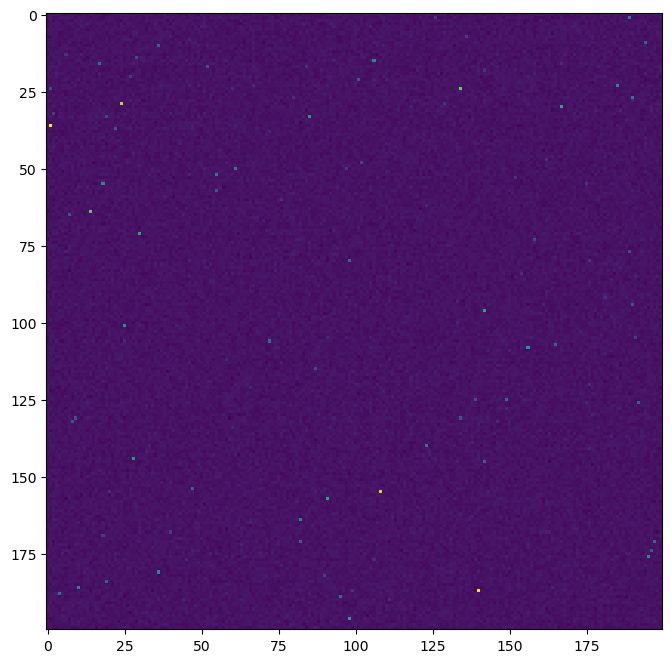

In [21]:
fig,ax = plt.subplots()
ax.imshow(data[:,:,1])

In [22]:
for i in range(10):
    print("graph " + str(i) + ": " + str(data[112,58,i-1])+ "\n")

graph 0: -0.3237110056858855

graph 1: -0.3918729428606602

graph 2: 2.777001879421583

graph 3: 0.6257969829044501

graph 4: 0.7635841786607512

graph 5: -0.2554283151595644

graph 6: -1.0048422490270879

graph 7: 0.5653420603925549

graph 8: 0.049178742103527184

graph 9: -0.6824762191413716



##### By comparing with other pics at the same pixel, we can figure out that this pixel at graph 2 is significantly higher than other graphs. 

#### Question 4

My partner and I have different pdf since I need to concern the difference between 10 images in order to find the supernova which only occur in one picture. In this case, I will have a different standard deviation value from the pdf that my partner yield. 

## END OF LAB 4